# INPUT TO SLIDES

C:\Users\bvq720\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


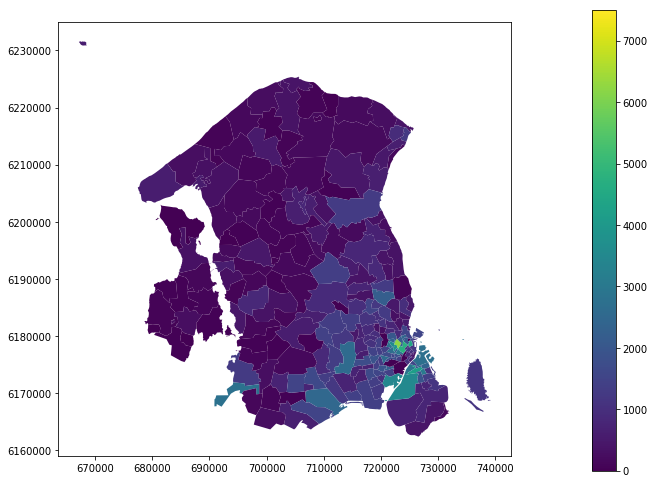

C:\Users\bvq720\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


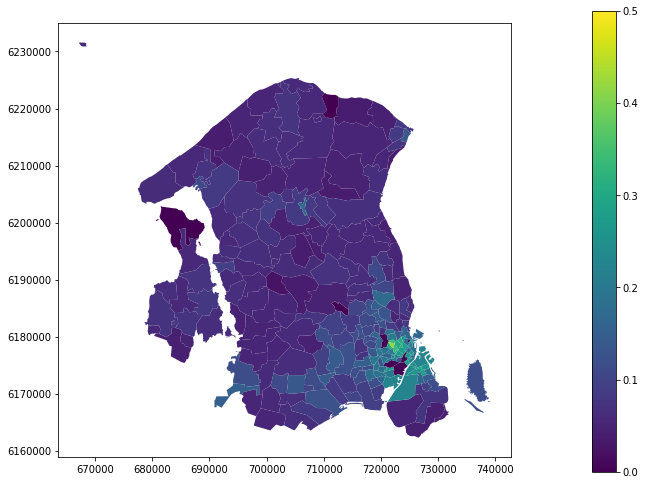

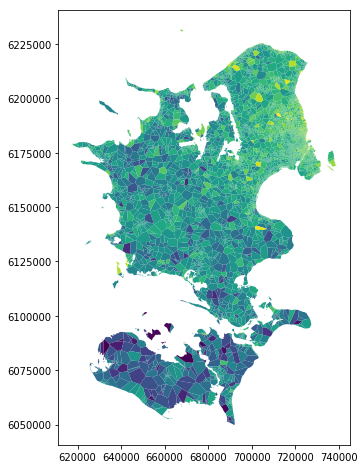

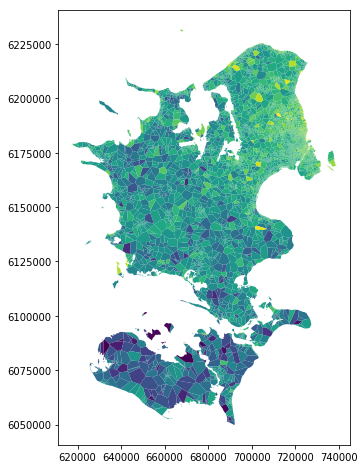

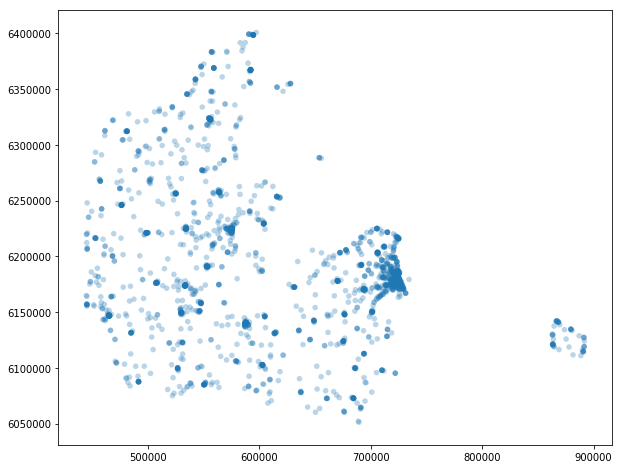

In [1]:
%run spatial_data_auxiliary.ipynb

# Spatial data
Manipulation and plotting

*Andreas Bjerre-Nielsen*

# Overview
- [Introduction](#Motivation)
- [Spatial fundementals: shapes and coordinates](#Core-concepts)
- Working with spatial data
    - [Geopandas for data stucturing](#Spatial-Data-Structures)
    - Plotting: static and [interactive](#Folium:-Plots-with-interaction)

- Spatial procedures:
    - [input-output](#Loading-and-storing-spatial-data)
    - [set-operations and joins](#Spatial-operations)
    - [interpolation](#Spatial-interpolation)
- Other: assignments and exam project

# Motivation

## Why spatial data?

- Data supply is exploding
    - Free public big data
        - Infrastructure and buildings
        - Weather, housing market, traffic, job openings
        - Other APIs
    - Private big data
        - Smartphone: GPS sensors/wifi
- Spatial proximity > social relation?


## Why spatial data? (2)

Let's try some free public data: 
- Where are the buildings in Denmark? (i.e. where do people live)

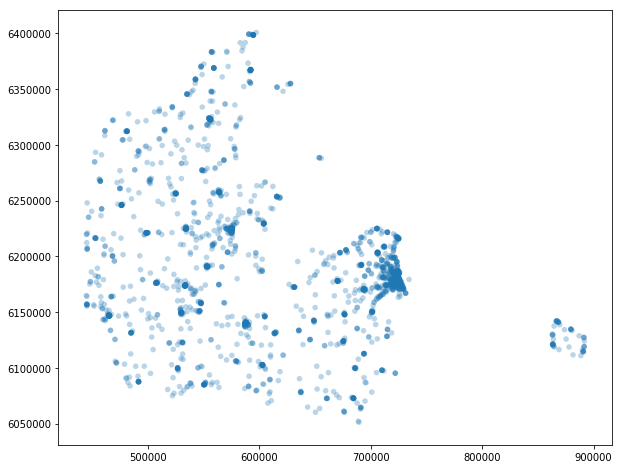

In [2]:
f_restaurant_buffer

## Why spatial data? (3)

- Feature engineering
    - Approximate local measures (interpolation)
    - Intersect behavior and context:
        - Did you visit the supermarket yesterday?
        - Are people who spend more time in greenspace less streesed, less likely to use their phone?
- Identification strategy
    - Spatial RD: use separation administrative boundaries as causal effect
    - Heterogeneous policy responses:

# Core concepts

## What is spatial data? 

- What are spatial objects? Do you know any?

- Spatial objects include classic geometric objects (lines, circles, squares etc.)
- Divided into four different generic shapes:
    - Point
    - LineString
    - Polygon (also approximates circles)
    - Multipolygon

## What is spatial data? (2)

Example of a LineString

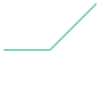

In [3]:
from shapely.geometry import LineString

line_coords = np.array([[0,3],[1,3],[2,4]])

LineString(line_coords)

## What is spatial data? (3)

Example of a polygon

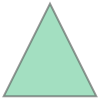

In [4]:
from shapely.geometry import Polygon

triangle_coords = np.array([[0,0],[2,0],[1,2]])

Polygon(triangle_coords)

## What is spatial data? (4)

Examples of multi-polygons

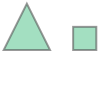

In [5]:
from shapely.geometry import MultiPolygon

square = np.array([[3,0],[3,1],[4,1],[4,0]])

MultiPolygon([Polygon(triangle_coords),
              Polygon(square)])

## How do we measure spatial data? 

We need to define the space we work in. What could this be?

- Observations on earth use different Coordinate References System (CRS).

- Some CRS are local and some are global.


## How do we measure spatial data?  (2)

The standard CRS is:

- The Global Positioning System (GPS)
  - Technically called WGS84
  - Has EPSG code 4326 (EPSG: European Petroleum Survey Group, now extinct)

## How do we measure spatial data?  (3)

Working with Danish spatial data you often encounter:

- The Danish mapping reference 
  - Technically called ETRS89 UTM Zone 32 North
  - Has EPSG code 25832
  - This is used in Danish admin data.
  - Coordinates measured in meters: can use Euclidian distance

# Applied spatial data

## How do we work with spatial data?

GeoPandas: 
- Collection of spatial objects
    - Powerful data structuring 
    - Static plots
- Combines
    - Pandas (labelled arrays and methods)
    - Shapely (Python shape objects)
    - Fiona (low level, ultra fast for complex operations)

Folium
- Interactive plots: map overlay for OpenStreetMaps and zoom

# Spatial Data Structures

## Spatial shapes

We have already seen how to employ `shapely` to construct spatial shapes.

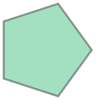

In [6]:
unit_circle_points = [(np.cos(d),np.sin(d)) for d in np.linspace(0, 2*np.pi, 6)]
Polygon(unit_circle_points)

What if we have more than one spatial object?

We could store spatial objects in lists but that is not smart. Why?

## GeoSeries
A smart container for spatial data is the GeoSeries:
- 1d array with labels (like Pandas series) 
- useful spatial tools

In [7]:
country_shapes.head(3)

0    POLYGON ((61.21081709172574 35.65007233330923,...
1    (POLYGON ((16.32652835456705 -5.87747039146621...
2    POLYGON ((20.59024743010491 41.85540416113361,...
Name: geometry, dtype: object

## GeoDataFrame

There is also the GeoDataFrame which has a dedicated column for geometry:

In [8]:
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


# Map making

## Static plots

Let's try to plot the world's countries. Easy as hell with GeoPandas:

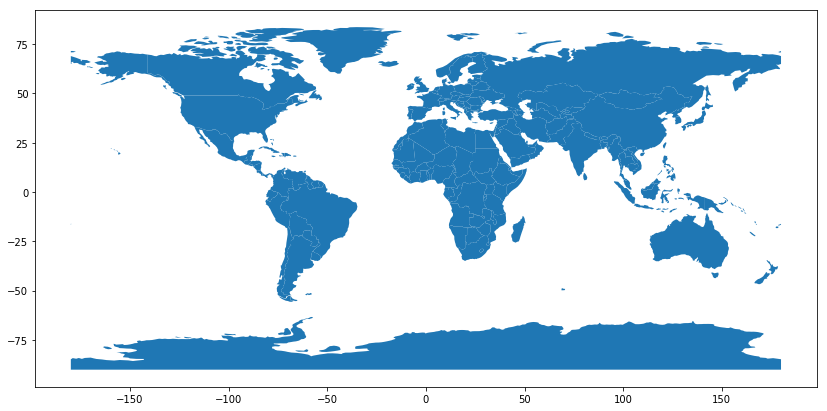

In [9]:
world_map.plot(figsize=(14,7))

## Static plots (2)

Now let's try to plot the share of young around in the Capital Region of Denmark (excluding Bornholm):

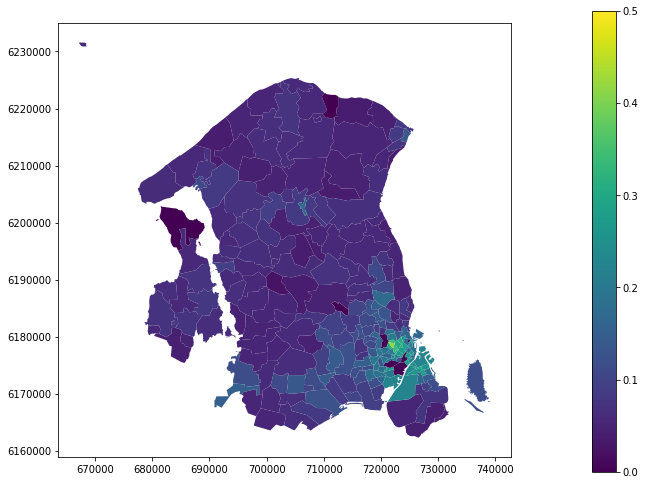

In [10]:
f_cph_young

## Static plots (3)

Never plot sum or count !!! !

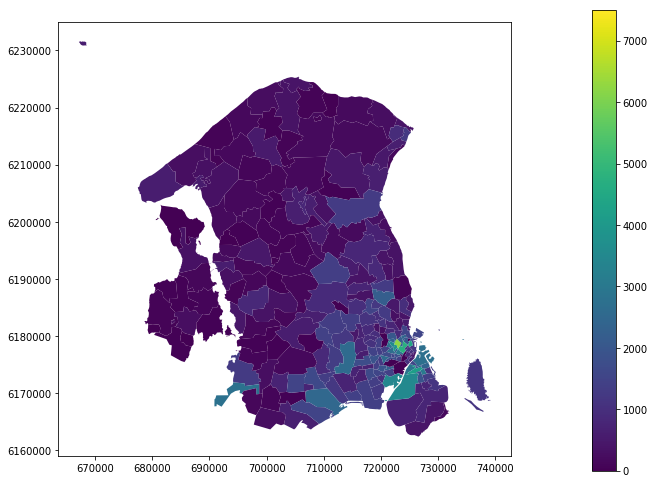

In [11]:
f_cph_young_count

## Folium: Plots with interaction

Make a map of many points for Danish supermarkets.

In [12]:
m_dk_supermarket

# Loading and storing spatial data

There are two standard formats:
- GeoJSON (.geojson):
    - This is getting more common, especially in more modern applications.
- Shapefiles (.shp)
    - The de-facto standard format. This is a collection of files where the central one is the `.shp` file.
    
Example - load house price data:

In [13]:
gdf = gpd.read_file('house_prices.geojson')

# Spatial operations 

When having two or more spatial objects it is possible to make interactions between them.

Basic operations

- Shortest distance between shapes (e.g. Euclidian distance between two points)
    - What about in spherical coordinates? (using Haversine formula is one solution)

# Spatial operations (2)

Advanced operations

- Set like operations ~ make new shapes:
    - Intersection (A and B)
    - Union (A or B)    
    - Difference (A not B)
- We can ask whether two shapes 
    - Intersect or not
    - Touch or not

# Spatial operations (3)

Basic 'set-like' operations in `shapely`.

In [14]:
rect_coords = [[0, 0], [0, 2], [1, 2], [1, 0]]

A = Polygon(triangle_coords)
B = Polygon(rect_coords)

# A | B # union
# A & B # intersection
# A - B # set difference

# Spatial operations (4)
 
Example of spatial join through intersection with `GeoPandas`' `sjoin`.

In [15]:
supermarket_cph = gpd.sjoin(gdf_supermarket, kommuner_cph)
supermarket_cph.head(3)

,id,lat,lon,tags,type,geometry,name,index_right,komkode,komnavn,regionskode,regionsnavn
8,272860527,55.655972,12.485416,"{'name': 'Netto', 'shop': 'supermarket'}",node,POINT (719255.6405412797 6173300.325984053),Netto,167,0101,København,1084,Region Hovedstaden
9,272860703,55.643196,12.501363,"{'name': 'Netto', 'shop': 'supermarket'}",node,POINT (720330.1542702764 6171929.991743754),Netto,167,0101,København,1084,Region Hovedstaden
15,282680168,55.647999,12.526752,"{'name': 'SuperBrugsen', 'opening_hours': 'Mo-...",node,POINT (721899.9097495852 6172545.122327959),SuperBrugsen,167,0101,København,1084,Region Hovedstaden


# Spatial operations (5)

Check output of spatial join

In [16]:
centroid = supermarket_cph.centroid.to_crs(epsg=4326)
for lat,lon in zip(centroid.y, centroid.x):
    marker_cluster_cph.add_child(folium.Marker(location=[lat, lon]))
marker_cluster_cph.add_to(m_dk_supermarket_cph)
m_dk_supermarket_cph

# Spatial interpolation

## Why spatial interpolation?

- Often we are interested in 
    - Data for neighborhoods not just points
    - Having measure available everywhere

- Spatial data is often sparse and pointwise    
    - What about areas in between?
    - Which points to use?


## Why spatial interpolation? (2)

Let's plot 2012 house sale prices. 
- We notice some rural regions have little coverage 

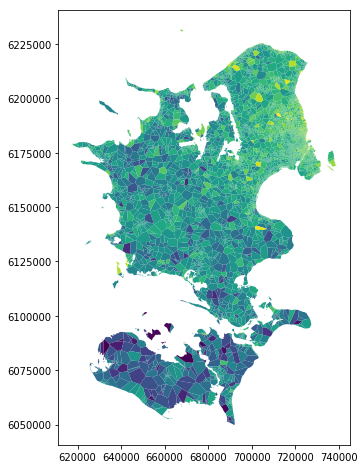

In [17]:
f_price_pointcloud

## What is spatial interpolation? 

What is the simplest possible spatial interpolation pattern?

- The nearest neighbor?

- The nearest neighbor plot is known a the Voronoi plot

## What is spatial interpolation? (2)

Let's see what a Voronoi plot looks like

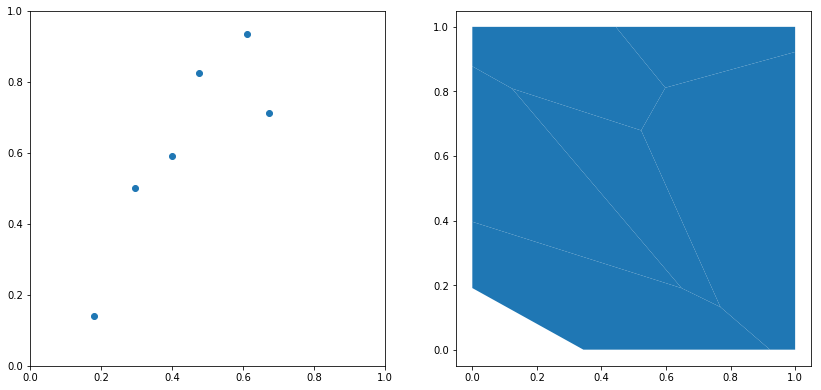

In [18]:
from shapely.geometry import box, Point

f, ax = plt.subplots(1, 2, figsize=(14, 7))

coords = pd.DataFrame(np.random.rand(6,2))
gpd.GeoSeries(coords.apply(Point,axis=1)).plot(ax=ax[0])
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)

voronoi_wrapper(coords, box(0,0,1,1)).plot(ax=ax[1])

## What is spatial interpolation? (3)

The Voronoi plot for Danish house sale prices in 2012:


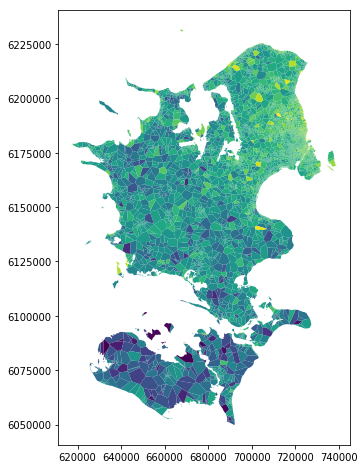

In [19]:
f_price_voronoi

## What is spatial interpolation? (4)

The nearest neighbor method (exercise)

- Find the k nearest points
    - Regression: Take mean of k-nearest
    - Classification: Take mode of k-nearest

- The measurement space can be physical e.g. surface distance i 2d 
- A machine learning model 
    - non-parametric approach
    - requires L2 normalization

# Summary

We have learned about
- Spatial shapes and coordinate systems
- Perform operations on single shapes and collections of shapes
- Make interactive maps
- Interpolate spatial data

# Group work

Assignments
- individual hand-in

Projects
- data 
- groups


# Further topics
- Spatial autocorrelation
- Interpolation with `kriging`: assesing uncertainty